# ANOVA

## Assumptions

Analysis of variances (ANOVA) is used to investigate the effect of one or several categorical predicting variables on one or several random variables, e.g. the influence of different fertilizers and varieties on the variable yield. The ANOVA is not significant when the variances are overlapping each other. 

Example for a model -- two-factorial ANOVA with interaction:

$$Y_{ijk} = \mu + \alpha_{i} + \beta_{j} + (\alpha\beta)_{ij} + \varepsilon_{ijk}$$

$Y_{ijk}$ is the random response variable, $\mu$ represents the expected value, $\alpha_{i}$ stands for the effect of the i$^{th}$ level of factor A, $\beta_{j}$ is the effect of the j$^{th}$ level of factor B, $(\alpha\beta)_{ij}$ represents the interaction, $\varepsilon_{ijk}$ stands for the experimental error, k is the number of repetitions.

Assumptions for an ANOVA are:

   * **Normal distribution of $\varepsilon_{ijk}$** within the respective groups $\rightarrow$ Plot of residuals, dots should be normal distributed above and below the zero-line for all categories. A boxplot might serve this purpose as well.  
   
   * **Homogeneity of variances** is assumed.
   
   * **Independency of data** is assumed.


$$H_{0}^{1}: $\mu_{A1} = \mu_{A2} = \mu_{A3} , H_{0}^{2}: \mu_{B1} = \mu_{B2}$$

$$H_{1}^{1}: \text{exists at least one} $\mu_{A_{i}} \neq \mu_{A_{j}},  H_{1}^{2}: \mu_{B1} \neq \mu_{B2}$$


## Implementation

### Building a Model

    statsmodels.formula.api.ols(formula = "target ~ groupingvariable", data = pd.df).fit()
    
Former users of R will be familiar with the formula construct.

### Analyzing the Model

    statsmodels.api.stats.anova_lm(model, typ = 2)
    
<tt>model</tt> is expected to be <tt>statsmodels.formula.api.ols.fit()</tt> object.

The <tt>typ = 2</tt> should be used for unbalanced designs, it omitts interaction terms. Of course python supports types 1 and 3 as well.

## Example: Corn

### Experiment

Do methods of biological plant protection reduce the effect of insects on corn ears efficiently? Researchers compared the ear weight of corn for five different biological treatments:  the beneficial nematode  *Steinernema carpocapsae*, the wasp *Trichogramma pretiosum*, a combination of those first two, the bacterium *Bacillus thuringiensis* and a non treated control group. Ears of corn were randomly sampled from each plot and weighed (data shown below, Martinez, 1998, cited according to Samuels and Wittmer, 2003, p. 463f).

In [1]:
import pandas as pd
corn = pd.read_csv('data/corn.csv', sep='\t')
corn

,treatment,response
0,nem,16.5
1,nem,15.0
2,nem,11.5
3,nem,12.0
4,nem,12.5
5,nem,9.0
6,nem,16.0
7,nem,6.5
8,nem,8.0
9,nem,14.5


### Statistical Analysis

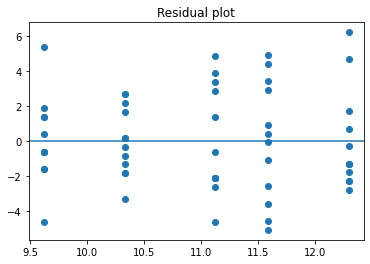

In [18]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

model = ols(formula="response ~ treatment", data=corn).fit()
pred_val = model.fittedvalues.copy()
true_val = corn['response'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

   * **Homogeneity of variances** is assumed.
   
   * **Normal distribution** of residuals (see plot)
   
   * **Independent data**
   
$\Longrightarrow$ ANOVA with one factor. Hypotheses: 

$$H_{0}:  \mu_{nem} = \mu_{wasp} = \mu_{nem+wasp} = \mu_{bac} = \mu_{control}$$

$$H_{1}: \text{exists at least one} \mu_{treatment} \neq \mu_{treatment'}$$



In [19]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
treatment,4.0,52.308333,13.077083,1.646093,0.175814
Residual,55.0,436.937500,7.944318,NaN,NaN


### Interpretation

The first column names the rows for the predictor treatment and the Residuals. <tt>df</tt>
presents the degrees of freedom while <tt>sum_sq</tt> gives the sums of squares for treatment
and residuals, <tt>mean_sq</tt> gives the mean squares and <tt>F</tt> returns the test statistic
(which is the mean square for the factor divided by the mean square for the error) .
The p-value is given in the column <tt>PR(>F)</tt>. For this model, the p-value is greater than
0.05 which leads to the conclusion that the null hypothesis (no difference in biological
treatments) is kept: It was not possible to verify a significant difference in yield for
different biological treatments for a confidence level of 0.95.

## Example Soybeans (3)

### Experiment

A plant physiologist investigated the effect of mechanical stress on the growth of soybean plants. Individually potted seedlings were randomly allocated to four treatment groups of 13 seedlings each. Seedlings in two groups were stressed by shaking for 20 minutes twice daily, while two control groups were not stressed. Thus, the first factor in the experiment was presence or absence of stress with two levels. Also, plants were grown in either low or moderate light $\Longrightarrow$ second factor. The leaf areas of each plant are given below. (Pappas and Mitchell, 1984, cited after Samuels and Wittmer, 2003, p. 491).

In [12]:
soy = pd.read_csv('data/soybeans.csv', sep='\t')
soy

,treatment_A,treatment_B,response
0,Low_Light,Control,264
1,Low_Light,Control,200
2,Low_Light,Control,225
3,Low_Light,Control,268
4,Low_Light,Control,215
5,Low_Light,Control,241
6,Low_Light,Control,232
7,Low_Light,Control,256
8,Low_Light,Control,229
9,Low_Light,Control,288


### Statistical Analysis

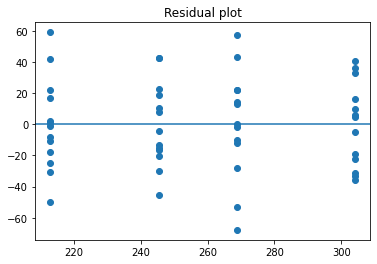

In [23]:
model = ols(formula="response ~ treatment_B + treatment_A + treatment_A : treatment_B", data=soy).fit()

pred_val = model.fittedvalues.copy()
true_val = soy['response'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

   * **Homogeneity of variances** of the residuals is assumed.

   * Approximate **normal distribution** of residuals
   
   * **Independent data** (randomized groups).

$\Longrightarrow$ Analysis by ANOVA. Question: Does mechanical stress and different levels of light lead to at least one difference between the experiment groups? Hypotheses (including the interaction):

$$H_{0}^{A}:  \mu_{stress} = \mu_{nostress}, H_{0}^{B}: \mu_{light} = \mu_{dark}$$

$$H_{1}^{A}:  \mu_{stress} \neq \mu_{nostress}, H_{1}^{B}: \mu_{light} \neq \mu_{dark}$$


$$H_{0}^{A'B}: \mu_{stressfactor,lightfactor} = \mu_{stressfactor} + \mu_{lightfactor} - \mu$$
$$H_{1}^{A'B}:  \mu_{stressfactor,lightfactor} \neq \mu_{stressfactor} + \mu_{lightfactor} - \mu$$



In [24]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
treatment_B,1.0,14858.480769,14858.480769,16.595355,1.725007e-04
treatment_A,1.0,42751.557692,42751.557692,47.748978,1.010104e-08
treatment_A:treatment_B,1.0,26.326923,26.326923,0.029404,8.645695e-01
Residual,48.0,42976.307692,895.339744,NaN,NaN


### Interpretation

The table of variances (Interpretation instructions are given in the previous example) shows that the factors light treatment and seismic stress have a significant influence on the leaf area of soybean seedlings. There exists no significant interaction. In this experiment, it can be seen "at one glance" where the differences between the groups are located because there are only two respective levels. 

## Example: Alfalfa

### Experiment

"Researchers were interested in the effect that acid rain has on the growth rate of alfalfa plants. They created three treatment groups in an experiment: low acid, high acid and control. The response variable in their experiment was the average height of the alfalfa plants in a Styrofoam cup after five days of growth. (The observational unit was a cup, rather than individual plants.) They had 5 cups for each of the 3 treatments, for a total of 15 observations. However, the cups were arranged near a window and they wanted to account for the effect of differing amounts of sunlight. Thus, they created 5 blocks and randomly assigned the 3 treatments within each block", data is shown below (Neumann et al., 2001, Samuels and Wittmer, 2003, p. 487).

In [26]:
alf = pd.read_csv('data/alfalfa.csv', sep='\t')
alf

,acid,block,height
0,low,1,1.58
1,low,2,1.15
2,low,3,1.27
3,low,4,1.25
4,low,5,1.00
5,high,1,1.10
6,high,2,1.05
7,high,3,0.50
8,high,4,1.00
9,high,5,1.50


### Statistical Analysis

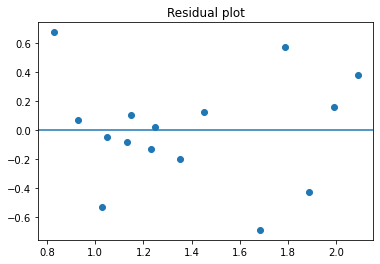

In [25]:
model = ols(formula="height ~ acid + block", data=alf).fit()
pred_val = model.fittedvalues.copy()
true_val = alf['height'].values.copy()
residual = true_val - pred_val
plt.scatter(pred_val, residual)
plt.title("Residual plot")
plt.axhline()

   * **Homogeneity of variances** is assumed.
   
   * Approximate **normal distribution** of residuals.
   
   * **Independent data** (randomized block design).


$\Longrightarrow$ ANOVA with the following hypotheses:

$$H_{0}^{1}: \mu_{low} = \mu_{high} = \mu_{control}$$

$$H_{1}^{1}: \text{exists at least one} \mu_{acid} \neq \mu_{acid'}$$

$$H_{0^{2}}: \mu_{block1} = \mu_{block2} = \mu_{block3} = \mu_{block4} = \mu_{block5}$$

$$H_{1}^{2}: \text{exists at least one} \mu_{block} \neq \mu_{block'}$$

In [27]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
acid,2.0,1.986013,0.993007,5.506618,0.022024
block,1.0,0.308053,0.308053,1.708278,0.217871
Residual,11.0,1.983627,0.180330,NaN,NaN


The table of variances shows that acid influences the height of alfalfa plants significantly with an error probability of 5%. The exact location of the difference cannot be obtained from an ANOVA because there are three treatments compared with each other. A multiple comparison test might solve this problem. 

<font size="3"><div class="alert alert-warning"><b>Exercise 11.1:</b> <br> 
A petroleum gel was applied on Cherry Laurel leaves in order to investigate the effect on leaf transpiration. 16 leaves were chosen and divided randomly in four groups. The first group served as a control while gel was applied on the top side of leaves in the second group, on the lower side of leaves in the fourth group and on both sides of leaves in the third group. The weight of each leaf was measured. The leaves were hanging at a shady place with good air circulation for three days and the weight was measured afterwards, again. The loss of water is presented below (Bishop et al., 1980, p. 56).
    
Is the data obtained by this experiment suiting for analysis of variances? If so, formulate the hypotheses and do an ANOVA! 
</div>
</font>

In [28]:
cherry = pd.read_csv('data/cherry.csv', sep='\t')
cherry

,treatment,response
0,control,86
1,control,108
2,control,118
3,control,79
4,top,41
5,top,44
6,top,40
7,top,52
8,bottom,25
9,bottom,35


<font size="3">
<b>Try it yourself:</b></font>

Further reading: 
    
   * <https://www.statsmodels.org/dev/example_formulas.html>